In [1]:
from dask_image.imread import imread
import dask.array as da
import os
import numpy as np
import joblib
import dask  # Import Dask first
dask.config.set({'dataframe.query-planning': False})  # Disable query-planning

import dask.dataframe as dd  # Now import dask.dataframe
import pandas as pd
import dask.dataframe as dd
from spatialdata import read_zarr

c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [2]:
sdata = read_zarr(r"C:\Users\Mattias\Documents\projects\HOGENT\Bach_proef\Bachelor_proef_VIB\Testdata_MACSima\Testdata_CA.zarr")

sdata

c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


SpatialData object, with associated Zarr store: C:\Users\Mattias\Documents\projects\HOGENT\Bach_proef\Bachelor_proef_VIB\Testdata_MACSima\Testdata_CA.zarr
├── Images
│     ├── 'channel_0': DataArray[cyx] (1, 4500, 7000)
│     ├── 'channel_1': DataArray[cyx] (1, 4500, 7000)
│     ├── 'channel_2': DataArray[cyx] (1, 4500, 7000)
│     ├── 'channel_3': DataArray[cyx] (1, 4500, 7000)
│     ├── 'channel_4': DataArray[cyx] (1, 4500, 7000)
│     ├── 'channel_5': DataArray[cyx] (1, 4500, 7000)
│     ├── 'channel_6': DataArray[cyx] (1, 4500, 7000)
│     ├── 'channel_7': DataArray[cyx] (1, 4500, 7000)
│     ├── 'channel_8': DataArray[cyx] (1, 4500, 7000)
│     ├── 'channel_9': DataArray[cyx] (1, 4500, 7000)
│     ├── 'channel_10': DataArray[cyx] (1, 4500, 7000)
│     ├── 'channel_11': DataArray[cyx] (1, 4500, 7000)
│     ├── 'channel_12': DataArray[cyx] (1, 4500, 7000)
│     ├── 'channel_13': DataArray[cyx] (1, 4500, 7000)
│     ├── 'channel_14': DataArray[cyx] (1, 4500, 7000)
│     ├── 'channel_

In [4]:
sdata['channel_22'].values

array([[[153, 190, 237, ...,  87, 208, 316],
        [172, 329, 273, ...,   0, 182, 233],
        [318, 250, 274, ..., 317, 128, 217],
        ...,
        [380, 182, 251, ..., 261,  72,  88],
        [348, 246, 251, ..., 147, 163, 284],
        [  0, 300, 342, ..., 120,   0, 195]]], dtype=uint16)

In [4]:
keys = list(sdata.images.keys())

keys

['channel_0',
 'channel_1',
 'channel_10',
 'channel_100',
 'channel_101',
 'channel_102',
 'channel_103',
 'channel_104',
 'channel_105',
 'channel_106',
 'channel_107',
 'channel_108',
 'channel_109',
 'channel_11',
 'channel_110',
 'channel_111',
 'channel_112',
 'channel_113',
 'channel_114',
 'channel_115',
 'channel_116',
 'channel_117',
 'channel_118',
 'channel_119',
 'channel_12',
 'channel_120',
 'channel_121',
 'channel_122',
 'channel_123',
 'channel_124',
 'channel_125',
 'channel_126',
 'channel_127',
 'channel_128',
 'channel_129',
 'channel_13',
 'channel_130',
 'channel_131',
 'channel_132',
 'channel_133',
 'channel_134',
 'channel_135',
 'channel_136',
 'channel_137',
 'channel_138',
 'channel_139',
 'channel_14',
 'channel_140',
 'channel_141',
 'channel_142',
 'channel_143',
 'channel_144',
 'channel_145',
 'channel_146',
 'channel_147',
 'channel_148',
 'channel_149',
 'channel_15',
 'channel_150',
 'channel_151',
 'channel_152',
 'channel_16',
 'channel_17',
 'ch

In [4]:
IMAGE_SIZE = 256
STRIDE = IMAGE_SIZE - 32

def extract_patches(array:np.ndarray):
    patches = []
    h, w = array.shape

    # Ensure that the image dimensions are divisible by the patch size and stride
    for i in range(0, h - IMAGE_SIZE + 1, STRIDE):
        for j in range(0, w - IMAGE_SIZE + 1, STRIDE):
            img_patch = array[i:i+IMAGE_SIZE, j:j+IMAGE_SIZE]
            patches.append(img_patch)

    return np.array(patches)
    
extract_patches(sdata['channel_0'].data.squeeze()).shape

(589, 256, 256)

In [ ]:
def extract_patches_per_channel(sdata, channel, patch_size=512, stride=256):
    """Extract patches from a specific channel in SpatialData."""
    img = sdata.images[f"channel_{channel}"].values[0] / 225
    labels = sdata.labels["labels"].values // 255

    patches, label_patches = [], []
    h, w = img.shape

    for i in range(0, h - patch_size, stride):
        count_x+=1
        for j in range(0, w - patch_size, stride):
            img_patch = array[i:i+patch_size, j:j+patch_size]

            patches.append(img_patch)

    print(count_x)
    return np.array(patches)

X = extract_patches(sdata['channel_0'].data.squeeze(), patch_size=512, stride=256)
len(X)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Input, Dropout
from tensorflow.keras.models import Model


In [ ]:
def unet_model_smaller(input_size=(512, 512, 1)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Decoder
    u4 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c3)  # Match c2 filters
    u4 = concatenate([u4, c2])
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(u4)
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u5 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4)  # Match c1 filters
    u5 = concatenate([u5, c1])
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = Model(inputs, outputs)
    return model


In [ ]:
def unet_model(input_size=(512, 512, 1)):
    inputs = Input(input_size)

    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs, outputs)
    return model


In [ ]:
extract_patches_per_channel

In [ ]:
batch_size = 8
epochs = 5

channels = 1

for channel in range(channels):
    print(f"\nTraining U-Net for Channel {channel}...\n")

    X, Y = extract_patches_per_channel(sdata, channel, patch_size=1024, stride=512)

    
    X = np.expand_dims(X, axis=-1)  
    Y = np.expand_dims(Y, axis=-1)  

    
    model = unet_model_smaller(input_size=(1024, 1024, 1))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X, Y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

    model.save(f"unet_channel_{channel}.h5")

    print(f"\nFinished training U-Net for Channel {channel}!\n")

In [ ]:
new_model = tf.keras.models.load_model("unet_channel_0.h5")

X, Y =  extract_patches_per_channel(sdata, 2, patch_size=512, stride=256)


new_model.predict(X)

In [ ]:
def pad_image_to_patch_size(img, patch_size):
    h, w = img.shape
    pad_h = (patch_size - h % patch_size) % patch_size
    pad_w = (patch_size - w % patch_size) % patch_size
    return np.pad(img, ((0, pad_h), (0, pad_w)), mode='reflect')

In [ ]:
IMAGE_SIZE = 256
STRIDE = IMAGE_SIZE - 32

from skimage.util import view_as_windows

def extract_patches_skimage(array: np.ndarray):
    window_shape = (IMAGE_SIZE, IMAGE_SIZE)
    step = STRIDE
    patches = view_as_windows(array, window_shape, step=step)
    patches = patches.reshape(-1, IMAGE_SIZE, IMAGE_SIZE)
    return patches


out = extract_patches_skimage(sdata['channel_0'].values.squeeze())
shape = extract_patches(sdata['channel_0'].data.squeeze())

In [ ]:
out

In [1]:
import sys
import os
import numpy as np
import logging
import keras

import gc
from tensorflow.keras import backend as K

from spatialdata import SpatialData
from spatialdata import read_zarr
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Input
from tensorflow.keras.models import Model
from skimage.util import view_as_windows

c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [2]:
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy

def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def iou(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)

def bce_dice_loss(y_true, y_pred):
    bce = binary_crossentropy(y_true, y_pred)
    dice_loss = 1 - iou (y_true, y_pred)
    return bce + dice_loss

In [3]:
model = keras.models.load_model(
                r"..\model\pixel_classifier_256.keras",
                custom_objects={'bce_dice_loss': bce_dice_loss, 'dice_coef': dice_coef, 'iou': iou}
            )

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [8]:
IMAGE_SIZE = 256
STRIDE = IMAGE_SIZE - 32

def extract_patches_skimage(array):
    window_shape = (IMAGE_SIZE, IMAGE_SIZE)
    step = STRIDE
    patches = view_as_windows(array, window_shape, step=step)
    patches = patches.reshape(-1, IMAGE_SIZE, IMAGE_SIZE)
    
    return patches

In [9]:
sdata = read_zarr(r"D:\data\test\2023_11_22_CelineEveraert_R1_B1_ROI1.zarr")

labels = extract_patches_skimage(sdata['annotations'].values) // 255
images = extract_patches_skimage(sdata['C-001_S-000_B_APC_R-01_W-B-1_ROI-01_A-None.tif'].values.squeeze()) / 255

labels

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
predictions = model.predict(input_image)

from PIL import Image
import numpy as np

img = Image.fromarray(predictions.squeeze(), 'L')
lab = Image.fromarray(labels[0])
img.show()

1/1 [==============================] - 0s 17ms/step


In [ ]:
directories = open(r"..\model\files.txt", "r")

directories.read().split("\n")

In [5]:
def get_size(start_path = '.'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

    return total_size//1_000_000
list = []
dir = r"E:\data\train"
for arg in os.listdir(dir):
    size = get_size(os.path.join(dir, arg))
    list.append((arg, size))

def myFunc(e):
  return e[1]

list.sort(key=myFunc)

for i in list:
    print(f"{i[0]}: {i[1]}")

2024_09_12_M16_CellineEveraert_12_R01_B01_ROI2.zarr: 3854
2024_09_12_M16_CellineEveraert_12_R01_B01_ROI1.zarr: 3939
2024_09_06_M15_Annelies_Van Hemelryk_UCSC_Neuroblastoma_2_R01_A01_ROI1.zarr: 5596
Testdata_CA.zarr: 5997
2024_09_06_M15_Annelies_Van Hemelryk_UCSC_Neuroblastoma_2_R01_A01_ROI5.zarr: 6262
2024_09_20_M17_SPC-035_HelenaAegerter_R01_A01_ROI3.zarr: 6731
Testdata_CE.zarr: 7376
2024_03_15_CelineEveraert_3_R01_D01_ROI1.zarr: 7418
2024_09_12_M16_CellineEveraert_12_R01_B01_ROI3.zarr: 8077
2024_09_12_M16_CellineEveraert_12_R01_B01_ROI4.zarr: 8467
2024_03_15_CelineEveraert_3_R01_B01_ROI1.zarr: 9411
2024_09_20_M17_SPC-035_HelenaAegerter_R01_A01_ROI2.zarr: 10057
2024_09_06_M15_Annelies_Van Hemelryk_UCSC_Neuroblastoma_2_R01_A01_ROI4.zarr: 12542
2024-09-25_exp38_SPC-036_CelineEveraert 1_R01_B01_ROI2.zarr: 14028
2024_03_15_CelineEveraert_3_2_R01_D01_ROI1.zarr: 16447
2024_03_15_CelineEveraert_3_2_R01_B01_ROI1.zarr: 21533
2024_08_29_M14_CelineEveraert_11_R01_B01_ROI2.zarr: 22182
2024_08_29_

In [4]:
import napari
from scipy.ndimage import label
from scipy.ndimage import binary_erosion

# create the viewer with an image
viewer = napari.Viewer()
dir = r"E:\data\train"
for arg in os.listdir(dir):
    print(arg)
    sdata = read_zarr(os.path.join(dir, arg))

    data = sdata['annotations'].data

    structure = np.ones((3, 3))

    eroded = binary_erosion(data, structure=structure)

    labeled_array, num_features = label(eroded, structure=structure)

    viewer.add_labels(data)

napari.run()

2024-09-25_exp38_SPC-036_CelineEveraert 1_R01_B01_ROI1.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024-09-25_exp38_SPC-036_CelineEveraert 1_R01_B01_ROI2.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_03_15_CelineEveraert_2b_R01_B01_ROI1.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_03_15_CelineEveraert_3_2_R01_B01_ROI1.zarr
2024_03_15_CelineEveraert_3_2_R01_D01_ROI1.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_03_15_CelineEveraert_3_R01_B01_ROI1.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_03_15_CelineEveraert_3_R01_D01_ROI1.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_08_29_M14_CelineEveraert_11_R01_B01_ROI1.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_08_29_M14_CelineEveraert_11_R01_B01_ROI2.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_09_06_M15_Annelies_Van Hemelryk_UCSC_Neuroblastoma_2_R01_A01_ROI1.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_09_06_M15_Annelies_Van Hemelryk_UCSC_Neuroblastoma_2_R01_A01_ROI2.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_09_06_M15_Annelies_Van Hemelryk_UCSC_Neuroblastoma_2_R01_A01_ROI3.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_09_06_M15_Annelies_Van Hemelryk_UCSC_Neuroblastoma_2_R01_A01_ROI4.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_09_06_M15_Annelies_Van Hemelryk_UCSC_Neuroblastoma_2_R01_A01_ROI5.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_09_12_M16_CellineEveraert_12_R01_B01_ROI1.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_09_12_M16_CellineEveraert_12_R01_B01_ROI2.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_09_12_M16_CellineEveraert_12_R01_B01_ROI3.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_09_12_M16_CellineEveraert_12_R01_B01_ROI4.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_09_20_M17_SPC-035_HelenaAegerter_R01_A01_ROI1.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_09_20_M17_SPC-035_HelenaAegerter_R01_A01_ROI2.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024_09_20_M17_SPC-035_HelenaAegerter_R01_A01_ROI3.zarr


c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


In [ ]:
viewer.layers

In [29]:
from scipy.ndimage import label

sdata = read_zarr(os.path.join(dir, arg))

data = sdata['annotations'].data + 1


labeled_array, num_features = label(data)

height = []
width = []
for i in range(1, num_features + 1):
    rows, cols = np.where(labeled_array == i)
    min_row, max_row = rows.min(), rows.max()
    min_col, max_col = cols.min(), cols.max()
    
    height.append(max_row - min_row + 1)
    width.append(max_col - min_col + 1)

# Print dimensions of each shape
print(f"- Mean: W={np.mean(width)} H={np.mean(height)}")
print(f"- std: W={np.std(width)} H={np.std(height)}")
print(f"- Max: W={np.max(width)} H={np.max(height)}")
print(f"- Min: W={np.min(width)} H={np.min(height)}")

c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\zarr\creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


- Mean: W=3021.0 H=2475.25
- std: W=394.0 H=363.184784235243
- Max: W=3415 H=2870
- Min: W=2627 H=2073


In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Mattias\anaconda3\envs\classifier_env\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Mattias\anaconda3\envs\classifier_env\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\traitlets\config\application.py", lin

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Mattias\anaconda3\envs\classifier_env\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Mattias\anaconda3\envs\classifier_env\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\Mattias\anaconda3\envs\classifier_env\lib\site-packages\traitlets\config\application.py", lin

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

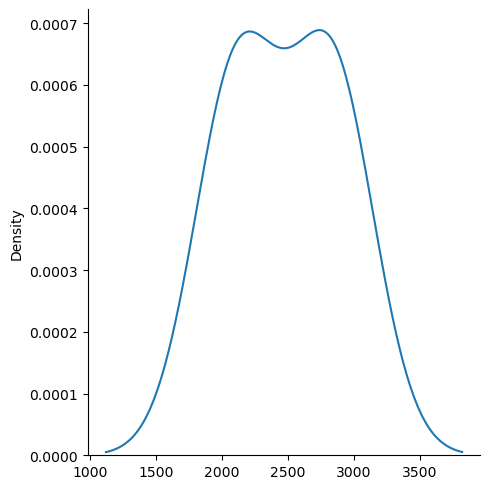

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(height, kind="kde")

plt.show()

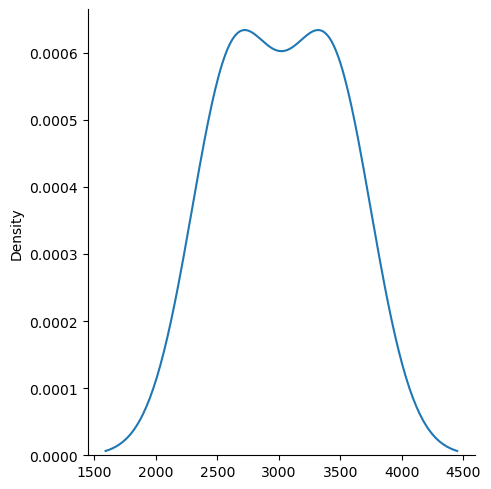

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(width, kind="kde")

plt.show()